# preliminaryResults Cibersort Fractions PCA
```
Andrew Davidson
aedavids@ucsc.edu
4/4/2023
```

ran Stanford docker on 2022-10-18-07 took 83:02 hrs. 
```
aedavids@mustard $ pwd
/private/groups/kimlab/GTEx_TCGA/cibersort.out/GTEx_TCGA_TrainGroupby_mixture

aedavids@mustard $ cat run_cibersortx_fractions.sh.parameters.txt 
docker run --detach --rm -e USERID=30108 
-v /scratch/aedavids/GTEx_TCGA/geneSignatureProfiles/best/tmp:/src/data 
-v /scratch/aedavids/cibersort.out/GTEx_TCGA_TrainGroupby_mixture-2022-10-18-07.40.54-PDT:/src/outdir cibersortx/fractions 
--username aedavids@ucsc.edu 
--token 3f561ab6d4cf373d11f23d8e205b4b72
--mixture GTEx_TCGA_TrainGroupby_mixture.txt 
--sigmatrix signatureGenes.tsv --perm 100 
--label GTEx_TCGA_TrainGroupby_mixture-2022-10-18-07.40.54-PDT --QN FALSE --verbose TRUE
```

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches

import os
import pandas as pd
import pathlib as pl
from sklearn.decomposition import PCA
import sys

# hack to enable us to import MatPlotLibUtilities
module_path = os.path.abspath(os.path.join('../../../deseq/python'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
from plots.utilities import MatPlotLibUtilities


/private/home/aedavids/extraCellularRNA/terra/deseq/python


In [2]:
dockerRootPl = pl.Path("/private/groups/kimlab/GTEx_TCGA/cibersort.out/GTEx_TCGA_TrainGroupby_mixture")
dockerResultsPl =  dockerRootPl.joinpath("CIBERSORTx_GTEx_TCGA_TrainGroupby_mixture_Results.txt")

colDataRootPl = pl.Path("/private/groups/kimlab/GTEx_TCGA/groupbyGeneTrainingSets")
colDataPl = colDataRootPl.joinpath("GTEx_TCGA_TrainColData.csv")

imgOutPl = pl.Path("../img/clusters/preliminaryResultsCibersortFractionsPCA")

## Load fractions 
filter out samples with high p-values and or low correlations. 

In [3]:
fractionsDF = pd.read_csv(dockerResultsPl, index_col='Mixture', sep="\t")
print(f'fractionsDF.shape : {fractionsDF.shape}')
fractionsDF_columns = fractionsDF.columns
fractionColumns = fractionsDF_columns[1:-3].values.tolist()
print(f'len(fractionColumns) : {len(fractionColumns)}')
fractionsStatsColumns = fractionsDF_columns[-3:]
print(f'fractionsStatsColumns : {fractionsStatsColumns}')

fractionsDF.shape : (15801, 86)
len(fractionColumns) : 82
fractionsStatsColumns : Index(['P-value', 'Correlation', 'RMSE'], dtype='object')


In [4]:
pValueThreshold = 0.001
selectRows = fractionsDF.loc[:, 'P-value'] <= pValueThreshold
signifigantFractionsDF = fractionsDF.loc[selectRows, :]
signifigantFractionsDF.shape

(14104, 86)

In [5]:
correlationThreshold = 0.9
selectRows = signifigantFractionsDF.loc[:, 'Correlation'] >= correlationThreshold
#print(f'len(selectRows) {len(selectRows)}  sum(selectRows) : {sum(selectRows)}' )
filteredFractionsDF = signifigantFractionsDF.loc[selectRows, :]
display(filteredFractionsDF.head())
filteredFractionsDF.shape

,ACC,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,BLCA,BRCA,Bladder,...,Thyroid,UCEC,UCS,UVM,Uterus,Vagina,Whole_Blood,P-value,Correlation,RMSE
Mixture,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-0226-SM-5GZZ7,0.000002,0.320885,0.156637,0.000154,0.093915,0.114577,0.069651,0.002817,0.000000,0.010365,...,0.000000,0.000419,0.000000,0.000274,0.005279,0.000201,0.000000,0.0,0.985425,0.926455
GTEX-1117F-0526-SM-5EGHJ,0.000022,0.295300,0.150368,0.000842,0.084349,0.111973,0.084769,0.000000,0.000000,0.037517,...,0.001837,0.000000,0.000000,0.003625,0.058127,0.006272,0.000000,0.0,0.979791,0.934695
GTEX-1117F-0726-SM-5GIEN,0.000153,0.054458,0.010553,0.000014,0.000000,0.000000,0.016459,0.000000,0.000033,0.000851,...,0.000295,0.000000,0.000000,0.000000,0.000000,0.000063,0.002664,0.0,0.984906,0.447916
GTEX-1117F-2826-SM-5GZXL,0.000000,0.290041,0.142267,0.000078,0.077349,0.106923,0.041902,0.000503,0.000000,0.003527,...,0.000000,0.001126,0.000305,0.007555,0.000000,0.000000,0.011835,0.0,0.988464,0.907675
GTEX-1117F-3226-SM-5N9CT,0.000217,0.004459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000188,...,0.000000,0.000000,0.000183,0.008095,0.000050,0.000000,0.000439,0.0,0.917052,0.949553


(9873, 86)

## Select a balance sub set of sample

In [6]:
colDataDF = pd.read_csv(colDataPl, index_col='sample_id')
display(colDataDF.head())
colDataDF.shape

,participant_id,category,gender,age,dataSet
sample_id,,,,,
GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F,Adipose_Subcutaneous,Female,66.0,GTEx
GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F,Artery_Tibial,Female,66.0,GTEx
GTEX-1117F-0726-SM-5GIEN,GTEX-1117F,Heart_Atrial_Appendage,Female,66.0,GTEx
GTEX-1117F-2826-SM-5GZXL,GTEX-1117F,Breast_Mammary_Tissue,Female,66.0,GTEx
GTEX-1117F-3226-SM-5N9CT,GTEX-1117F,Brain_Cortex,Female,66.0,GTEx


(15801, 5)

In [7]:
fractionsWithMetaDF = filteredFractionsDF.join(colDataDF, how='inner')
print(fractionsWithMetaDF.shape)
fractionsWithMetaDF.head()

(9873, 91)


,ACC,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,BLCA,BRCA,Bladder,...,Vagina,Whole_Blood,P-value,Correlation,RMSE,participant_id,category,gender,age,dataSet
GTEX-1117F-0226-SM-5GZZ7,0.000002,0.320885,0.156637,0.000154,0.093915,0.114577,0.069651,0.002817,0.000000,0.010365,...,0.000201,0.000000,0.0,0.985425,0.926455,GTEX-1117F,Adipose_Subcutaneous,Female,66.0,GTEx
GTEX-1117F-0526-SM-5EGHJ,0.000022,0.295300,0.150368,0.000842,0.084349,0.111973,0.084769,0.000000,0.000000,0.037517,...,0.006272,0.000000,0.0,0.979791,0.934695,GTEX-1117F,Artery_Tibial,Female,66.0,GTEx
GTEX-1117F-0726-SM-5GIEN,0.000153,0.054458,0.010553,0.000014,0.000000,0.000000,0.016459,0.000000,0.000033,0.000851,...,0.000063,0.002664,0.0,0.984906,0.447916,GTEX-1117F,Heart_Atrial_Appendage,Female,66.0,GTEx
GTEX-1117F-2826-SM-5GZXL,0.000000,0.290041,0.142267,0.000078,0.077349,0.106923,0.041902,0.000503,0.000000,0.003527,...,0.000000,0.011835,0.0,0.988464,0.907675,GTEX-1117F,Breast_Mammary_Tissue,Female,66.0,GTEx
GTEX-1117F-3226-SM-5N9CT,0.000217,0.004459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000188,...,0.000000,0.000439,0.0,0.917052,0.949553,GTEX-1117F,Brain_Cortex,Female,66.0,GTEx


In [8]:
# fix gender. Male, male, Female, female
fractionsWithMetaDF['gender'] = fractionsWithMetaDF['gender'].str.lower()
fractionsWithMetaDF.groupby('gender').count()

,ACC,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,BLCA,BRCA,Bladder,...,Uterus,Vagina,Whole_Blood,P-value,Correlation,RMSE,participant_id,category,age,dataSet
gender,,,,,,,,,,,,,,,,,,,,,
female,3349,3349,3349,3349,3349,3349,3349,3349,3349,3349,...,3349,3349,3349,3349,3349,3349,3349,3349,3349,3349
male,6524,6524,6524,6524,6524,6524,6524,6524,6524,6524,...,6524,6524,6524,6524,6524,6524,6524,6524,6524,6524


In [9]:
gender = fractionsWithMetaDF.loc[:, 'gender'].values
gender

array(['female', 'female', 'female', ..., 'female', 'female', 'female'],
      dtype=object)

# Plot

In [10]:
pcaDF = fractionsWithMetaDF.loc[:, fractionColumns]
print(pcaDF.shape)
pca = PCA(n_components=2)
x2dPCA_NP = pca.fit_transform(pcaDF)
print(x2dPCA_NP.shape)
x2dPCA_NP[0:5,]

(9873, 82)
(9873, 2)


array([[-0.08488995, -0.26651719],
       [-0.08002387, -0.2500334 ],
       [-0.02386911,  0.01006546],
       [-0.06825898, -0.23540199],
       [-0.011664  ,  0.04320163]])

In [11]:
mplu = MatPlotLibUtilities()
mplu.loadStyle()

In [12]:
def pcaPlot(panel, xNP, yNP, title, labels, labelDict):
    panel.set_xlabel("pca_1")
    panel.set_ylabel("pca_2")

    # the scale of the axis is not meaning full
    panel.set_xticks([])
    panel.set_yticks([])

    # panel.set_title("Training Fractions")
    panel.set_title(title)

    for i in range( len(xNP) ):
        markersize=5 #2.5 #1.5 #1.5,  # diameter of mark
        alpha=0.3
        # zorder is used to for our TE points and txt to be on top
        # of all other planes 
        zorder = 1  
        
        label=labels[i]
        color = labelDict[label]

        panel.plot(xNP[i], yNP[i], marker='o', 
                    markerfacecolor=color,
                   markeredgecolor=color,
                   markersize=markersize, 
                   markeredgewidth=0,
                   linewidth=0,
                   alpha=alpha,
                   zorder=zorder
                   ,label=label
                  )
    
    legendHandles = []
    legendLables = []
    y = 0
    for name, color in labelDict.items():
        p = mplpatches.Rectangle((0,y),2,1,
                                    linewidth=0,
                                    facecolor=color,
                                    edgecolor=(0,0,0))
        legendHandles.append(p)
        legendLables.append(name)
        y += 1
    
    legend = panel.legend(legendHandles, legendLables, loc='lower right')
    
    return legend

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


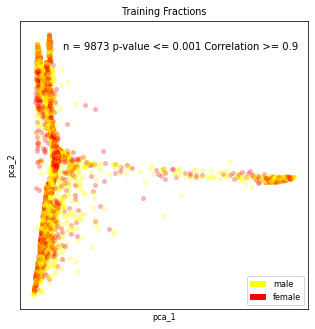

In [13]:
def maleFemalePCAPlot():
    # set up figure
    # standard paper size is 8.5 inches x 11 inches
    pageWidthInInches = 4 # 8 
    pageHeightInInches = 4 # 8 
    fig = plt.figure( figsize=( pageWidthInInches, pageHeightInInches ) )

    panelWidthInInches = pageWidthInInches
    panelHeightInInches = pageHeightInInches
    leftRelativeSize = 0.2
    bottomRelativeSize = 0.2
    panel = mplu.createPanel( fig,
                        panelWidthInInches, panelHeightInInches,
                        leftRelativeSize, bottomRelativeSize )


    xPCA_NP = x2dPCA_NP[:,0]
    yPCA_NP = x2dPCA_NP[:,1]
    title = "Training Fractions"
    labels = fractionsWithMetaDF.loc[:, 'gender'].values
    labelsDict = {'male' : 'yellow', 'female' : 'red'}

    ledgend =  pcaPlot(panel, xPCA_NP, yPCA_NP, title, labels, labelsDict)
    
    txt = f"n = {x2dPCA_NP.shape[0]} p-value <= {pValueThreshold} Correlation >= {correlationThreshold}"
    fig.text(x=0.35, y=1.1, s=txt, fontsize=10)

    imgFile = imgOutPl.joinpath("male_female")
    plt.savefig( imgFile, bbox_inches='tight', dpi=600, facecolor="white", transparent=True )
    
maleFemalePCAPlot()

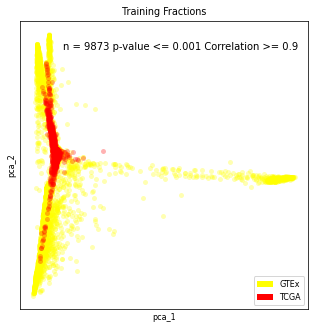

In [14]:
def GTEx_TCGA_PCAPlot():
    # set up figure
    # standard paper size is 8.5 inches x 11 inches
    pageWidthInInches = 4 # 8 
    pageHeightInInches = 4 # 8 
    fig = plt.figure( figsize=( pageWidthInInches, pageHeightInInches ) )

    panelWidthInInches = pageWidthInInches
    panelHeightInInches = pageHeightInInches
    leftRelativeSize = 0.2
    bottomRelativeSize = 0.2
    panel = mplu.createPanel( fig,
                        panelWidthInInches, panelHeightInInches,
                        leftRelativeSize, bottomRelativeSize )

    xPCA_NP = x2dPCA_NP[:,0]
    yPCA_NP = x2dPCA_NP[:,1]
    title = "Training Fractions"
    labels = fractionsWithMetaDF.loc[:, 'dataSet'].values
    labelsDict = {'GTEx' : 'yellow', 'TCGA' : 'red'}

    ledgend =  pcaPlot(panel, xPCA_NP, yPCA_NP, title, labels, labelsDict)

    txt = f"n = {x2dPCA_NP.shape[0]} p-value <= {pValueThreshold} Correlation >= {correlationThreshold}"
    fig.text(x=0.35, y=1.1, s=txt, fontsize=10)


    imgFile = imgOutPl.joinpath("gtex_tcga")
    plt.savefig( imgFile, bbox_inches='tight', dpi=600, facecolor="white", transparent=True )
    
GTEx_TCGA_PCAPlot()